In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Text analytics packages
import gensim
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Object serialization package
# Tutorial: https://pythonprogramming.net/python-pickle-module-save-objects-serialization/
import pickle

from gensim.models import CoherenceModel
import pyLDAvis

C:\Users\Darren\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
rq2 = pd.read_csv('rq2_dataset.csv')
print(rq2.info())
rq2.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35929 entries, 0 to 35928
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   popular                 35929 non-null  int64  
 2   Translated_Review       35929 non-null  object 
 3   Sentiment               35929 non-null  object 
 4   Sentiment_Polarity      35929 non-null  float64
 5   Sentiment_Subjectivity  35929 non-null  float64
 6   sentiment_text          35929 non-null  object 
 7   subjectivity_text       35929 non-null  object 
 8   processed_reviews       35866 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.5+ MB
None


App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  
0        Subjective  like eat delicious food thats im cooking food ...  
1         Objective         help eating healthy exercise regular basis  
2        Subjective          work great especially going grocery store  
3         Objective                                        best idea u  
4         Objective                                           best way

In [4]:
rq2 = rq2.dropna()
rq2['processed_further'] = rq2['processed_reviews'].map(lambda x: x.split())
rq2.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  \
0        Subjective  like eat delicious food thats im cooking food ...   
1         Objective         help eating healthy exercise regular basis   
2        Subjective          work great especially going grocery store   
3         Objective                                        best idea u   
4         Objective                                           best way   

                                   processed_further  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
2   [work, great, especially, going, grocery, store]  
3                                    [best, idea, u]  
4                                        [best, way]

In [5]:
popular = rq2[rq2['popular'] == 1].copy()
print(popular.shape)
non_popular = rq2[rq2['popular'] == 0].copy()
print(non_popular.shape)

(20165, 10)
(15701, 10)


C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Popular
# Create dictionary
non_popular_dictionary = gensim.corpora.Dictionary(non_popular['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

non_popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
non_popular_corpus_vect = [non_popular_dictionary.doc2bow(text) for text in non_popular['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
non_popular_topic_modelling = []
non_popular_perp = []
non_popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(non_popular_corpus_vect, num_topics = i, id2word=non_popular_dictionary, passes=25, random_state= 0)
    non_popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(non_popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    non_popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=non_popular['processed_further'], dictionary=non_popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    non_popular_coh.append(coherence_lda)
    
    print()
    
# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.034*"great" + 0.033*"love" + 0.029*"good" + 0.027*"game" + 0.024*"like" + 0.019*"app" + 0.019*"really" + 0.018*"easy" + 0.014*"best" + 0.013*"nice"
1: 0.017*"update" + 0.016*"work" + 0.014*"ad" + 0.012*"would" + 0.011*"phone" + 0.011*"app" + 0.010*"need" + 0.009*"add" + 0.009*"version" + 0.008*"good"
2: 0.025*"time" + 0.015*"get" + 0.014*"even" + 0.013*"cant" + 0.012*"im" + 0.011*"card" + 0.009*"work" + 0.009*"app" + 0.009*"say" + 0.008*"account"

No. of topics: 4
0: 0.038*"great" + 0.036*"love" + 0.026*"game" + 0.025*"like" + 0.021*"app" + 0.020*"easy" + 0.020*"good" + 0.017*"really" + 0.014*"nice" + 0.013*"best"
1: 0.027*"update" + 0.022*"work" + 0.014*"please" + 0.013*"phone" + 0.012*"open" + 0.011*"cant" + 0.010*"app" + 0.010*"fix" + 0.010*"new" + 0.009*"great"
2: 0.042*"time" + 0.016*"get" + 0.016*"even" + 0.013*"work" + 0.013*"cant" + 0.012*"im" + 0.012*"every" + 0.011*"ive" + 0.011*"used" + 0.010*"keep"
3: 0.024*"good" + 0.016*"ad" + 0.016*"like" + 0.013*"c


No. of topics: 11
0: 0.073*"great" + 0.046*"would" + 0.024*"app" + 0.022*"could" + 0.021*"like" + 0.019*"work" + 0.018*"need" + 0.016*"wish" + 0.014*"better" + 0.012*"feature"
1: 0.034*"cant" + 0.023*"even" + 0.019*"account" + 0.016*"let" + 0.016*"work" + 0.014*"profile" + 0.013*"search" + 0.012*"see" + 0.012*"need" + 0.012*"screen"
2: 0.076*"best" + 0.039*"food" + 0.027*"ever" + 0.019*"ive" + 0.014*"thanks" + 0.013*"recipe" + 0.013*"code" + 0.013*"calorie" + 0.013*"weight" + 0.012*"like"
3: 0.035*"ad" + 0.029*"free" + 0.024*"like" + 0.020*"pay" + 0.018*"many" + 0.017*"want" + 0.016*"get" + 0.013*"people" + 0.012*"way" + 0.010*"even"
4: 0.152*"good" + 0.025*"dating" + 0.025*"like" + 0.023*"people" + 0.022*"far" + 0.020*"bad" + 0.019*"really" + 0.017*"app" + 0.016*"ive" + 0.015*"looking"
5: 0.050*"update" + 0.022*"please" + 0.021*"phone" + 0.021*"year" + 0.019*"new" + 0.017*"version" + 0.016*"using" + 0.015*"still" + 0.015*"im" + 0.014*"old"
6: 0.132*"love" + 0.101*"easy" + 0.044*"use"

In [11]:
print(non_popular_topic_modelling[7])

LdaModel(num_terms=1404, num_topics=10, decay=0.5, chunksize=2000)


C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


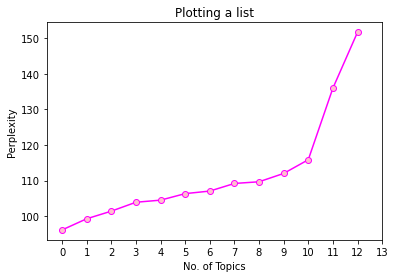

In [12]:
plt.plot(non_popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


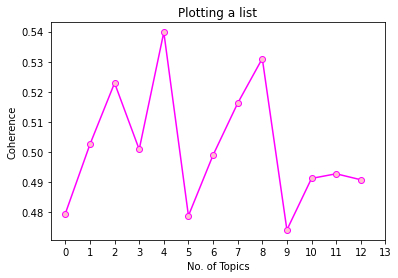

In [13]:
plt.plot(non_popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

# Topic Modelling for Non Popular App + Positive Reviews

In [6]:
non_popular.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  \
0        Subjective  like eat delicious food thats im cooking food ...   
1         Objective         help eating healthy exercise regular basis   
2        Subjective          work great especially going grocery store   
3         Objective                                        best idea u   
4         Objective                                           best way   

                                   processed_further  
0  [like, eat, delicious, food, thats, im, cookin...  
1  [help, eating, healthy, exercise, regular, basis]  
2   [work, great, especially, going, grocery, store]  
3                                    [best, idea, u]  
4                                        [best, way]

In [7]:
non_popular['sentiment_text'].value_counts()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neutral     7370
Positive    7117
Negative    1214
Name: sentiment_text, dtype: int64

In [8]:
non_popular_positive = non_popular[non_popular['sentiment_text'] == 'Positive'].copy()
non_popular_positive.shape

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7117, 10)

In [9]:
# Popular
# Create dictionary
non_popular_dictionary = gensim.corpora.Dictionary(non_popular_positive['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

non_popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
non_popular_corpus_vect = [non_popular_dictionary.doc2bow(text) for text in non_popular_positive['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
non_popular_topic_modelling = []
non_popular_perp = []
non_popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(non_popular_corpus_vect, num_topics = i, id2word=non_popular_dictionary, passes=25, random_state= 0)
    non_popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(non_popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    non_popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=non_popular_positive['processed_further'], dictionary=non_popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    non_popular_coh.append(coherence_lda)
    
    print()

# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.090*"good" + 0.082*"great" + 0.080*"love" + 0.029*"app" + 0.014*"really" + 0.014*"help" + 0.013*"food" + 0.013*"like" + 0.012*"game" + 0.012*"easy"
1: 0.024*"work" + 0.017*"great" + 0.016*"time" + 0.016*"would" + 0.013*"get" + 0.012*"update" + 0.012*"like" + 0.012*"app" + 0.012*"im" + 0.011*"free"
2: 0.049*"best" + 0.043*"easy" + 0.041*"nice" + 0.024*"awesome" + 0.022*"app" + 0.021*"like" + 0.020*"use" + 0.019*"amazing" + 0.019*"many" + 0.018*"people"

No. of topics: 4
0: 0.107*"good" + 0.104*"love" + 0.084*"great" + 0.035*"app" + 0.019*"easy" + 0.017*"food" + 0.016*"game" + 0.013*"much" + 0.013*"like" + 0.013*"track"
1: 0.028*"work" + 0.027*"great" + 0.019*"would" + 0.017*"update" + 0.014*"cant" + 0.014*"phone" + 0.014*"get" + 0.013*"app" + 0.013*"time" + 0.012*"like"
2: 0.053*"nice" + 0.035*"like" + 0.032*"many" + 0.031*"awesome" + 0.025*"amazing" + 0.024*"people" + 0.021*"ad" + 0.018*"app" + 0.017*"dating" + 0.016*"fun"
3: 0.051*"best" + 0.041*"easy" + 0.023*"i


No. of topics: 11
0: 0.477*"good" + 0.039*"far" + 0.039*"really" + 0.033*"user" + 0.029*"loved" + 0.022*"friendly" + 0.021*"like" + 0.020*"look" + 0.018*"pretty" + 0.014*"app"
1: 0.039*"update" + 0.033*"great" + 0.025*"work" + 0.025*"get" + 0.024*"problem" + 0.023*"im" + 0.020*"phone" + 0.020*"app" + 0.018*"cant" + 0.018*"still"
2: 0.127*"nice" + 0.057*"people" + 0.046*"like" + 0.040*"dating" + 0.039*"fun" + 0.023*"think" + 0.022*"date" + 0.020*"many" + 0.018*"photo" + 0.017*"lot"
3: 0.108*"best" + 0.040*"ive" + 0.037*"perfect" + 0.028*"ever" + 0.028*"used" + 0.025*"one" + 0.024*"time" + 0.022*"far" + 0.018*"card" + 0.018*"every"
4: 0.047*"awesome" + 0.034*"app" + 0.031*"helpful" + 0.028*"u" + 0.023*"like" + 0.021*"great" + 0.018*"would" + 0.017*"thank" + 0.016*"see" + 0.016*"full"
5: 0.040*"free" + 0.031*"game" + 0.020*"play" + 0.020*"like" + 0.019*"get" + 0.018*"best" + 0.018*"make" + 0.016*"time" + 0.015*"better" + 0.015*"also"
6: 0.226*"love" + 0.039*"food" + 0.037*"app" + 0.022*"

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


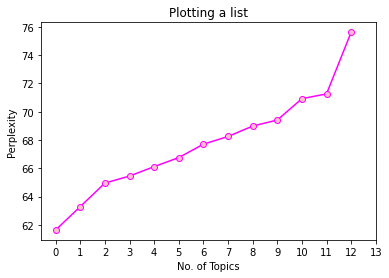

In [11]:
plt.plot(non_popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


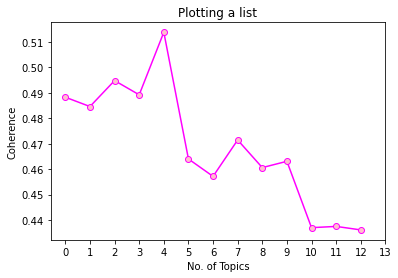

In [10]:
plt.plot(non_popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

# Topic Modelling for Non Popular App + Negative Reviews

In [12]:
non_popular['sentiment_text'].value_counts()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neutral     7370
Positive    7117
Negative    1214
Name: sentiment_text, dtype: int64

In [15]:
non_popular_negative = non_popular[non_popular['sentiment_text'] == 'Negative'].copy()
non_popular_negative.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


App  popular  \
29   10 Best Foods for You        0   
82   10 Best Foods for You        0   
92   10 Best Foods for You        0   
126  10 Best Foods for You        0   
179  10 Best Foods for You        0   

                                     Translated_Review Sentiment  \
29                  No recipe book Unable recipe book.  Negative   
82                                   Crap Doesn't work  Negative   
92   Boring. I thought actually just texts that's i...  Negative   
126                 No recipe book Unable recipe book.  Negative   
179                                  Crap Doesn't work  Negative   

     Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
29               -0.500                   0.500       Negative   
82               -0.800                   0.800       Negative   
92               -0.325                   0.475       Negative   
126              -0.500                   0.500       Negative   
179              -0.800                   0.800       Negative   

    subjectivity_text                                 processed_reviews  \
29          Objective                    recipe book unable recipe book   
82         Subjective                                  crap doesnt work   
92          Objective  boring thought actually text thats poor old text   
126         Objective                    recipe book unable recipe book   
179        Subjective                                  crap doesnt work   

                                     processed_further  
29                [recipe, book, unable, recipe, book]  
82                                [crap, doesnt, work]  
92   [boring, thought, actually, text, thats, poor,...  
126               [recipe, book, unable, recipe, book]  
179                               [crap, doesnt, work]

In [16]:
# Popular
# Create dictionary
non_popular_dictionary = gensim.corpora.Dictionary(non_popular_negative['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

non_popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
non_popular_corpus_vect = [non_popular_dictionary.doc2bow(text) for text in non_popular_negative['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
non_popular_topic_modelling = []
non_popular_perp = []
non_popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(non_popular_corpus_vect, num_topics = i, id2word=non_popular_dictionary, passes=25, random_state= 0)
    non_popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(non_popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    non_popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=non_popular_negative['processed_further'], dictionary=non_popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    non_popular_coh.append(coherence_lda)
    
    print()

# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.054*"fake" + 0.046*"annoying" + 0.045*"phone" + 0.043*"ad" + 0.037*"make" + 0.032*"like" + 0.032*"app" + 0.031*"suck" + 0.031*"please" + 0.030*"screen"
1: 0.087*"bad" + 0.084*"game" + 0.084*"time" + 0.049*"hate" + 0.044*"terrible" + 0.044*"get" + 0.038*"waste" + 0.027*"app" + 0.023*"keep" + 0.021*"pay"
2: 0.062*"cant" + 0.061*"even" + 0.060*"worst" + 0.041*"card" + 0.035*"ever" + 0.033*"work" + 0.030*"need" + 0.029*"im" + 0.026*"load" + 0.024*"wrong"

No. of topics: 4
0: 0.083*"fake" + 0.070*"annoying" + 0.066*"ad" + 0.052*"app" + 0.045*"like" + 0.036*"boring" + 0.036*"dont" + 0.031*"awful" + 0.029*"unable" + 0.029*"phone"
1: 0.052*"time" + 0.048*"terrible" + 0.046*"useless" + 0.041*"get" + 0.041*"waste" + 0.033*"account" + 0.030*"keep" + 0.030*"email" + 0.029*"call" + 0.028*"app"
2: 0.080*"worst" + 0.058*"even" + 0.057*"card" + 0.051*"cant" + 0.048*"ever" + 0.037*"load" + 0.031*"horrible" + 0.031*"add" + 0.030*"time" + 0.028*"slow"
3: 0.120*"bad" + 0.119*"game" +


No. of topics: 11
0: 0.134*"ad" + 0.097*"annoying" + 0.069*"screen" + 0.062*"information" + 0.055*"way" + 0.045*"unable" + 0.043*"app" + 0.042*"terrible" + 0.035*"could" + 0.035*"disappointing"
1: 0.180*"fake" + 0.131*"terrible" + 0.066*"pay" + 0.051*"email" + 0.045*"site" + 0.045*"nothing" + 0.037*"also" + 0.031*"money" + 0.031*"day" + 0.030*"give"
2: 0.093*"load" + 0.070*"never" + 0.061*"take" + 0.052*"even" + 0.051*"error" + 0.047*"without" + 0.046*"people" + 0.041*"poor" + 0.036*"awful" + 0.031*"horrible"
3: 0.390*"game" + 0.109*"suck" + 0.089*"play" + 0.084*"stupid" + 0.053*"let" + 0.052*"fix" + 0.036*"work" + 0.031*"even" + 0.030*"please" + 0.021*"account"
4: 0.345*"bad" + 0.106*"get" + 0.065*"account" + 0.048*"say" + 0.047*"log" + 0.044*"app" + 0.024*"know" + 0.024*"im" + 0.022*"thing" + 0.018*"never"
5: 0.203*"worst" + 0.092*"work" + 0.091*"ever" + 0.071*"message" + 0.070*"boring" + 0.053*"working" + 0.041*"time" + 0.037*"dont" + 0.033*"difficult" + 0.033*"getting"
6: 0.294*"c

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


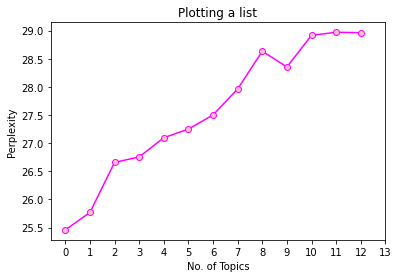

In [17]:
plt.plot(non_popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


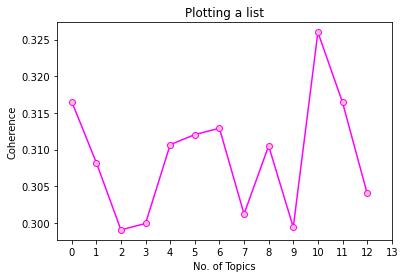

In [18]:
plt.plot(non_popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

# Topic Modelling for Non Popular App + Neutral Reviews

In [19]:
non_popular_neutral = non_popular[non_popular['sentiment_text'] == 'Neutral'].copy()
non_popular_neutral.head()

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


App  popular  \
1   10 Best Foods for You        0   
6   10 Best Foods for You        0   
7   10 Best Foods for You        0   
9   10 Best Foods for You        0   
19  10 Best Foods for You        0   

                                    Translated_Review Sentiment  \
1     This help eating healthy exercise regular basis  Positive   
6                                Looking forward app,   Neutral   
7               It helpful site ! It help foods get !   Neutral   
9   Useful information The amount spelling errors ...  Positive   
19                                         God health   Neutral   

    Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
1                 0.25                0.288462        Neutral   
6                 0.00                0.000000        Neutral   
7                 0.00                0.000000        Neutral   
9                 0.20                0.100000        Neutral   
19                0.00                0.000000        Neutral   

   subjectivity_text                                  processed_reviews  \
1          Objective         help eating healthy exercise regular basis   
6          Objective                                looking forward app   
7          Objective                         helpful site help food get   
9          Objective  useful information amount spelling error quest...   
19         Objective                                         god health   

                                    processed_further  
1   [help, eating, healthy, exercise, regular, basis]  
6                             [looking, forward, app]  
7                    [helpful, site, help, food, get]  
9   [useful, information, amount, spelling, error,...  
19                                      [god, health]

In [20]:
# Popular
# Create dictionary
non_popular_dictionary = gensim.corpora.Dictionary(non_popular_neutral['processed_further']) #map each word to a integer ID

# print('Sample word to id mappings:\n', list(popular_dictionary.items())[:50])
# print('Total Vocabulary Size:', len(popular_dictionary))

non_popular_dictionary.filter_extremes(no_below=20, no_above=0.5)
# print('Total Vocabulary Size:', len(popular_dictionary))

# Bag of words
non_popular_corpus_vect = [non_popular_dictionary.doc2bow(text) for text in non_popular_neutral['processed_further']]
# print(popular_corpus_vect[:10])

# Topic modelling
non_popular_topic_modelling = []
non_popular_perp = []
non_popular_coh = []

for i in range(3, 16):
    print('No. of topics:', i)
    ldamodel = gensim.models.ldamodel.LdaModel(non_popular_corpus_vect, num_topics = i, id2word=non_popular_dictionary, passes=25, random_state= 0)
    non_popular_topic_modelling.append(ldamodel)
    
    # Show results
    for num, topic in ldamodel.show_topics(formatted=True, num_topics=i, num_words=10):
        print(str(num)+": "+ topic)
        
    #  Perplexity
    log_perplexity = ldamodel.log_perplexity(non_popular_corpus_vect)
    perplexity = 2**(-log_perplexity)
    non_popular_perp.append(perplexity)
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=non_popular_neutral['processed_further'], dictionary=non_popular_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    non_popular_coh.append(coherence_lda)
    
    print()

# print(popular_topic_modelling)
# print(popular_perp)
# print(popular_coh)

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of topics: 3
0: 0.040*"game" + 0.033*"like" + 0.020*"really" + 0.017*"would" + 0.015*"love" + 0.015*"much" + 0.014*"good" + 0.013*"need" + 0.013*"great" + 0.012*"make"
1: 0.016*"time" + 0.014*"ad" + 0.014*"app" + 0.012*"get" + 0.011*"cant" + 0.010*"im" + 0.010*"money" + 0.009*"back" + 0.009*"even" + 0.009*"people"
2: 0.029*"work" + 0.025*"time" + 0.021*"update" + 0.017*"phone" + 0.014*"fix" + 0.013*"keep" + 0.013*"cant" + 0.013*"please" + 0.011*"app" + 0.011*"open"

No. of topics: 4
0: 0.034*"like" + 0.022*"app" + 0.016*"need" + 0.014*"would" + 0.011*"also" + 0.011*"much" + 0.010*"feature" + 0.010*"better" + 0.010*"really" + 0.009*"helpful"
1: 0.024*"time" + 0.015*"card" + 0.015*"account" + 0.014*"cant" + 0.013*"app" + 0.013*"even" + 0.012*"get" + 0.012*"back" + 0.010*"money" + 0.010*"ive"
2: 0.031*"work" + 0.026*"update" + 0.022*"time" + 0.017*"fix" + 0.016*"phone" + 0.016*"please" + 0.015*"keep" + 0.014*"show" + 0.014*"open" + 0.014*"cant"
3: 0.054*"game" + 0.025*"like" + 0.019*"


No. of topics: 12
0: 0.026*"easy" + 0.026*"helpful" + 0.024*"simple" + 0.024*"help" + 0.023*"app" + 0.021*"food" + 0.020*"use" + 0.020*"well" + 0.016*"really" + 0.015*"question"
1: 0.031*"picture" + 0.024*"like" + 0.024*"search" + 0.024*"people" + 0.022*"profile" + 0.020*"know" + 0.019*"see" + 0.015*"looking" + 0.015*"site" + 0.015*"cant"
2: 0.038*"cant" + 0.035*"show" + 0.030*"get" + 0.030*"u" + 0.018*"go" + 0.018*"anything" + 0.017*"thing" + 0.016*"see" + 0.016*"want" + 0.016*"nothing"
3: 0.149*"game" + 0.039*"play" + 0.031*"love" + 0.027*"really" + 0.026*"fun" + 0.025*"get" + 0.024*"great" + 0.021*"good" + 0.019*"like" + 0.017*"make"
4: 0.038*"account" + 0.026*"cant" + 0.022*"even" + 0.021*"get" + 0.021*"back" + 0.021*"message" + 0.021*"email" + 0.014*"money" + 0.014*"error" + 0.013*"log"
5: 0.040*"ad" + 0.033*"im" + 0.018*"app" + 0.017*"year" + 0.017*"version" + 0.016*"using" + 0.015*"like" + 0.014*"even" + 0.013*"ive" + 0.013*"used"
6: 0.065*"update" + 0.031*"phone" + 0.029*"work

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


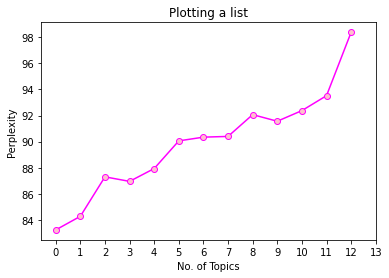

In [21]:
plt.plot(non_popular_perp, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_perp)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Perplexity') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

C:\Users\Darren\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


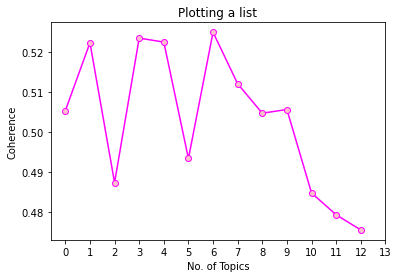

In [22]:
plt.plot(non_popular_coh, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(non_popular_coh)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Coherence') #set the label for y axis
plt.xlabel('No. of Topics') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph